In [1]:
import sys
import os
import scanpy as sc
import pandas as pd
import numpy as np
import loompy

print(sc.__version__)
print(loompy.__version__)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

loom_fn = "/Users/kriemo/Projects/sc_repos/medulloblast/results_v2/objects/shh.loom"

obj_dir = "objects"
if not os.path.exists(obj_dir):
    os.makedirs(obj_dir)
 
# load
adata = sc.read_loom(loom_fn, sparse = True)



1.4.4.post1
2.0.17
scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.9 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


/miniconda3/envs/py37/lib/python3.6/site-packages/loompy/loom_validator.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:
/miniconda3/envs/py37/lib/python3.6/site-packages/loompy/loom_layer.py:116: RuntimeWarning: invalid value encountered in greater
  nonzeros = np.where(vals > 0)


In [2]:
ds = loompy.connect(loom_fn)
harmony_mat = ds.ca["harmony_cell_embeddings"]
umap_mat = ds.ca["umap_harmony_cell_embeddings"]
#ds.ca.keys()
adata.obsm['X_pca'] = harmony_mat
adata.obsm['X_umap'] = umap_mat
ds.close()

In [3]:
print(adata.obs)
print(adata.var)

                       ClusterID ClusterName          Date   Dx  G2M_Score  \
801_AAACCCAGTGCAAGAC           2           1  1.552262e+09  MED  -0.113335   
801_AAAGAACCACGTAGTT           2           1  1.552262e+09  MED  -0.159048   
801_AAAGGATCAAGATGTA           4           3  1.552262e+09  MED   0.241858   
801_AAAGGATCAGAGCGTA           2           1  1.552262e+09  MED  -0.081360   
801_AAATGGACACGTCATA           3           2  1.552262e+09  MED  -0.033025   
...                          ...         ...           ...  ...        ...   
1416_TTTGATCCATATCTGG          1           0  1.555373e+09  MED  -0.234996   
1416_TTTGGAGAGCTAGTTC          1           0  1.555373e+09  MED  -0.075168   
1416_TTTGGAGAGTGAGTGC          4           3  1.555373e+09  MED   0.507087   
1416_TTTGGAGTCCGCGAGT          1           0  1.555373e+09  MED  -0.174686   
1416_TTTGTTGTCATTTCGT          3           2  1.555373e+09  MED   0.020646   

                      Phase RNA_snn_res_0_1 RNA_snn_res_0_3 RNA

In [4]:
adata.var_names_make_unique()
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
#sc.pp.scale(adata, max_value=10)
#sc.tl.pca(adata, svd_solver='arpack')


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [5]:
mdata = pd.read_csv("../tables/metadata_2019_09_06.tsv.gz", sep="\t")
  
mdata = mdata[mdata.cell.isin(list(adata.obs.index.values))]
mdata

/miniconda3/envs/py37/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cell,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,subgroup,Dx,Date,batch,kit,...,RNA_snn_res.0.5,seurat_clusters,coarse_clusters,cdiversity,csamples,coarse_cell_type,PC_1,PC_2,UMAP_1,UMAP_2
1121,801_AAACCCAGTGCAAGAC,801,6917,2539,27.526384,SHH,MED,2019-03-11T00:00:00Z,10,V3,...,20,20,13,0.034483,1,malignant,-0.875803,10.153408,-7.711029,16.046464
1124,801_AAAGAACCACGTAGTT,801,8275,2860,21.389728,SHH,MED,2019-03-11T00:00:00Z,10,V3,...,20,20,13,0.034483,1,malignant,-1.188449,7.352611,-7.271441,16.160493
1125,801_AAAGGATCAAGATGTA,801,5259,2134,26.031565,SHH,MED,2019-03-11T00:00:00Z,10,V3,...,20,20,13,0.034483,1,malignant,-0.614892,10.082095,-6.441710,15.722943
1126,801_AAAGGATCAGAGCGTA,801,9661,3570,10.775282,SHH,MED,2019-03-11T00:00:00Z,10,V3,...,20,20,13,0.034483,1,malignant,-6.443276,6.832627,-6.444171,16.045896
1127,801_AAATGGACACGTCATA,801,26582,4378,14.810774,SHH,MED,2019-03-11T00:00:00Z,10,V3,...,20,20,13,0.034483,1,malignant,-2.300787,7.686412,-7.637496,15.073215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36846,1416_TTTGATCCATATCTGG,1416,21477,4703,14.871723,SHH,MED,2019-04-16T00:00:00Z,13,V3,...,17,17,1,0.551724,16,malignant,-0.654215,13.592656,-1.778547,13.781640
36847,1416_TTTGGAGAGCTAGTTC,1416,7603,2432,14.967776,SHH,MED,2019-04-16T00:00:00Z,13,V3,...,17,17,1,0.551724,16,malignant,-3.436756,18.555148,-0.681689,14.138879
36848,1416_TTTGGAGAGTGAGTGC,1416,26820,5491,12.561521,SHH,MED,2019-04-16T00:00:00Z,13,V3,...,17,17,1,0.551724,16,malignant,-5.410811,10.242686,-0.912727,12.682811
36850,1416_TTTGGAGTCCGCGAGT,1416,11602,2979,10.205137,SHH,MED,2019-04-16T00:00:00Z,13,V3,...,17,17,1,0.551724,16,malignant,-3.533050,17.252267,-1.000652,14.495649


In [6]:

# reorder cell ids to match loom object
cids = pd.DataFrame({'cell' : adata.obs.index.values})
mdata = pd.merge(cids, mdata, how = 'left', on = 'cell')
mdata = mdata.dropna()


#sc.pl.umap(adata, color=['G',  'Sox2', 'Pitx2',
#                         'Mmp20', "Klk4", "sample"]) 
adata.write('./objects/shh_full_dataset.h5ad')


... storing 'ClusterName' as categorical
... storing 'Dx' as categorical
... storing 'Phase' as categorical
... storing 'RNA_snn_res_0_1' as categorical
... storing 'RNA_snn_res_0_3' as categorical
... storing 'RNA_snn_res_0_5' as categorical
... storing 'UPN' as categorical
... storing 'batch' as categorical
... storing 'coarse_cell_type' as categorical
... storing 'coarse_clusters' as categorical
... storing 'coarse_clusters_malignant' as categorical
... storing 'coarse_clusters_shh' as categorical
... storing 'coarse_clusters_shh_harmony' as categorical
... storing 'flowcell' as categorical
... storing 'fq_id' as categorical
... storing 'kit' as categorical
... storing 'orig_ident' as categorical
... storing 'seurat_clusters' as categorical
... storing 'subgroup' as categorical
... storing 'subtype' as categorical


In [14]:
adata = sc.read_h5ad('./objects/shh_full_dataset.h5ad')

# see https://github.com/theislab/anndata/issues/185
adata.raw._varm = None
#idx = adata.obs['clusters'].isin(['3', '6', '7', '8'])

#adata = adata[idx]
 
#sc.pp.scale(adata, max_value=10)
#sc.tl.pca(adata, svd_solver='arpack')
#sc.pl.pca(adata)

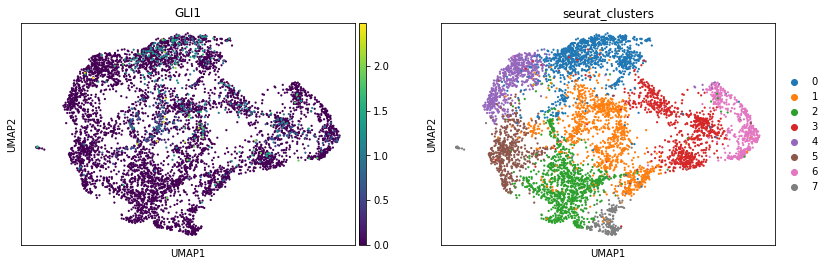

In [15]:
sc.pl.umap(adata, color=['GLI1', "seurat_clusters"]) 


In [16]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)
sc.tl.draw_graph(adata)
sc.tl.paga(adata, groups='seurat_clusters')



computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:33)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


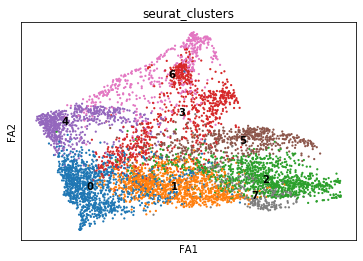

--> added 'pos', the PAGA positions (adata.uns['paga'])


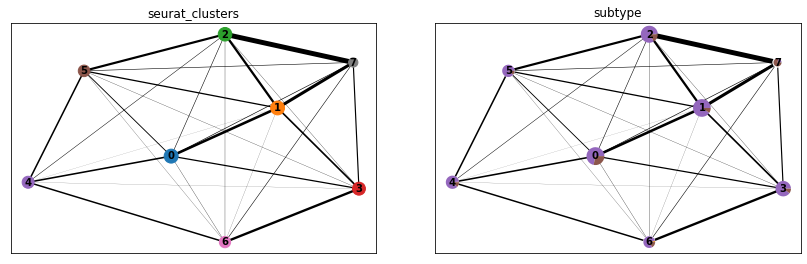

In [17]:
sc.pl.draw_graph(adata, color='seurat_clusters', legend_loc='on data')
sc.pl.paga(adata, color=['seurat_clusters', 'subtype'])


In [18]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:34)


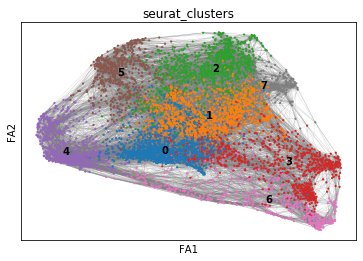

--> added 'pos', the PAGA positions (adata.uns['paga'])


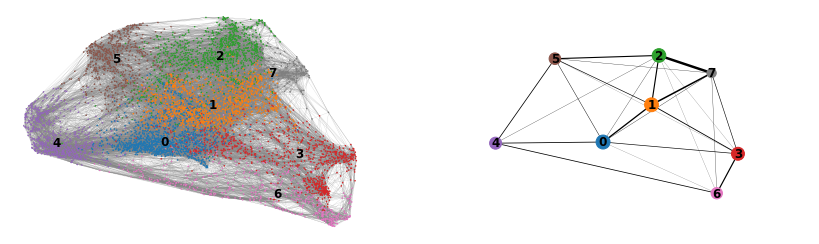

In [19]:
sc.pl.draw_graph(adata, color='seurat_clusters', legend_loc='on data', edges=True)
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=False)


In [50]:
root_condition = (adata.obs['seurat_clusters']  == '1')
#print(np.flatnonzero(root_condition)[0])
adata.uns['iroot'] = np.flatnonzero(root_condition)[0]


#adata.raw[np.where(adata.obs['sample']  == 'control'):, 'Qpct'].X
#qpct_vals = adata[adata.obs['seurat_clusters']  == '6'].raw[:, 'SOX2'].X
#qpct_vals
#root_cell = int(np.where(qpct_vals == float(np.max(qpct_vals)))[0])
#root_cell                        
#root_cell
#adata.uns['iroot'] = root_cell

In [51]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


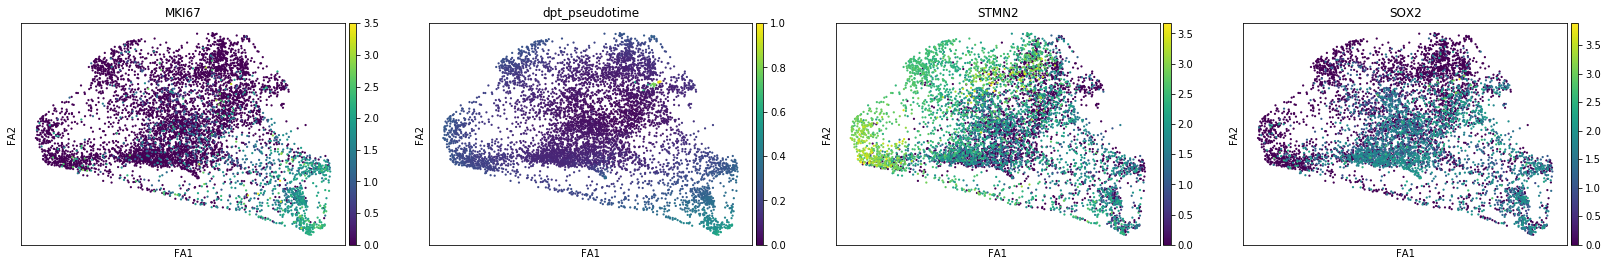

In [52]:
sc.pl.draw_graph(adata, color=['MKI67', 'dpt_pseudotime', 'STMN2', "SOX2"], legend_loc='right margin')

In [30]:
# next run some test to find genes that change via pseudotime

In [91]:
import diffxpy.api as de
adata.var.index.values

array(['MIR1302-2HG', 'OR4F5', 'AL627309.1', ..., 'AC023491.2',
       'AC004556.1', 'AC240274.1'], dtype=object)

In [86]:
test = de.test.continuous_1d(
    data=adata.X,
    continuous="dpt_pseudotime",
    df=3,
    formula_loc="~ 1 + dpt_pseudotime",
    factor_loc_totest=["dpt_pseudotime"],
    test="wald",
    sample_description=adata.obs.loc[:, ['dpt_pseudotime']],
   # quick_scale=False
  # batch_size=100
  #  training_strategy="DEFAULT"
   # dtype="float32"
)


ValueError: Missing gene names